In [71]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [72]:
fcn_subset = pd.read_csv('../results/fcn_subset.csv')
deformable_fcn_subset = pd.read_csv('../results/deformable_fcn_subset.csv')
inception_subset = pd.read_csv('../results/inceptiontime_subset.csv')

subset_results = pd.concat([fcn_subset, deformable_fcn_subset, inception_subset])
subset_results.shape

(166, 8)

In [73]:
grouped_subset_results = subset_results.groupby(['model', 'dataset']).mean().reset_index()
grouped_subset_results

,model,dataset,exp,acc,f1,recall,precision,time
0,deffcn,ArrowHead,2.0,0.856000,0.842944,0.866081,0.855813,234.196315
1,deffcn,BeetleFly,2.0,0.920000,0.915045,0.914667,0.920947,105.369863
2,deffcn,Car,2.0,0.926667,0.917877,0.917444,0.931936,303.864023
3,deffcn,Earthquakes,2.0,0.725180,0.555624,0.568848,0.584196,1171.827311
4,deffcn,FaceAll,2.0,0.935385,0.793440,0.783423,0.808631,1706.865763
5,deffcn,FreezerSmallTrain,2.0,0.877193,0.534429,0.507984,0.567813,61.007055
6,deffcn,Lightning7,2.0,0.736986,0.632690,0.635623,0.666871,254.853508
7,deffcn,MoteStrain,2.0,0.931470,0.925737,0.929919,0.930114,771.682161
8,deffcn,ProximalPhalanxTW,2.0,0.771707,0.565065,0.593554,0.585437,427.552446
9,deffcn,Wine,2.0,0.796296,0.669586,0.641852,0.717664,154.027917


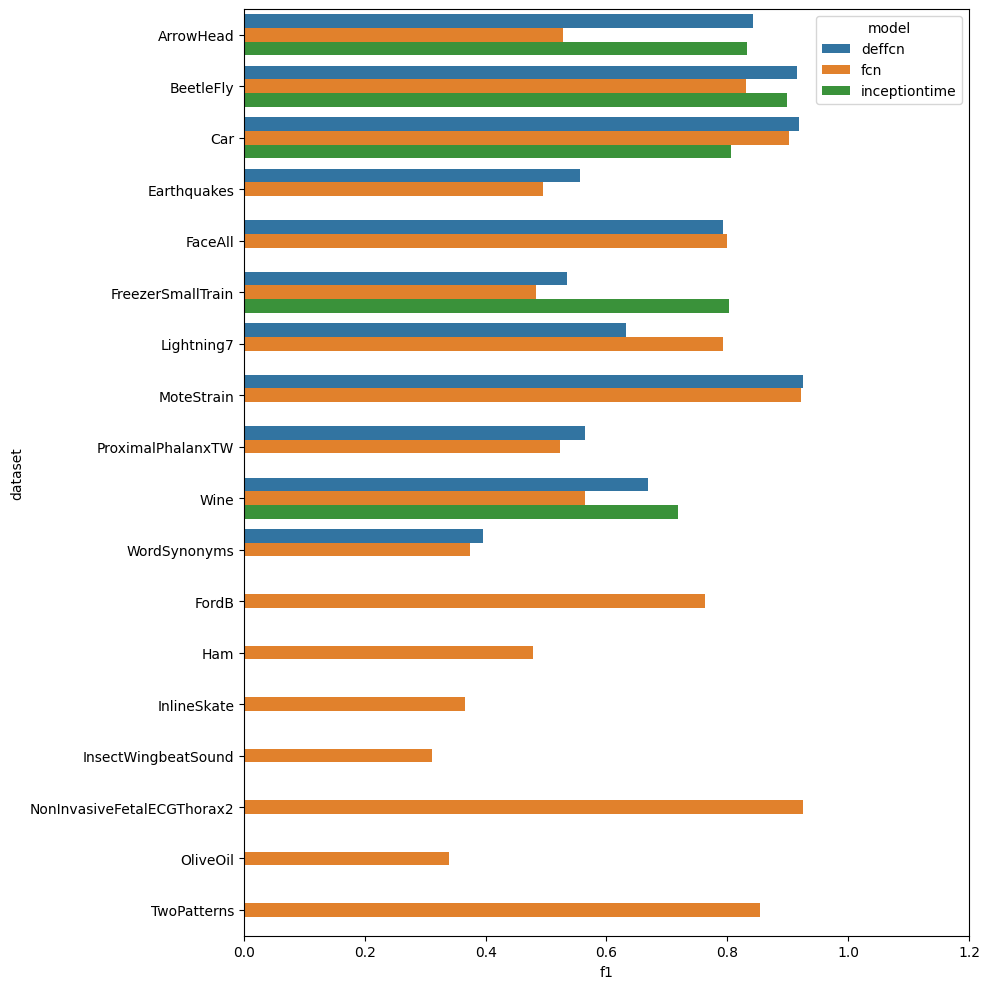

In [74]:
plt.figure(figsize=(10, 10))

ax = sns.barplot(data=grouped_subset_results, x='f1', y='dataset', hue='model')

# try:
#     ax.bar_label(ax.containers[0], labels=round(grouped_subset_results['f1'], 3))
# except:
#     pass

plt.xlim([0, 1.2])
plt.tight_layout()

(0.0, 1.2)

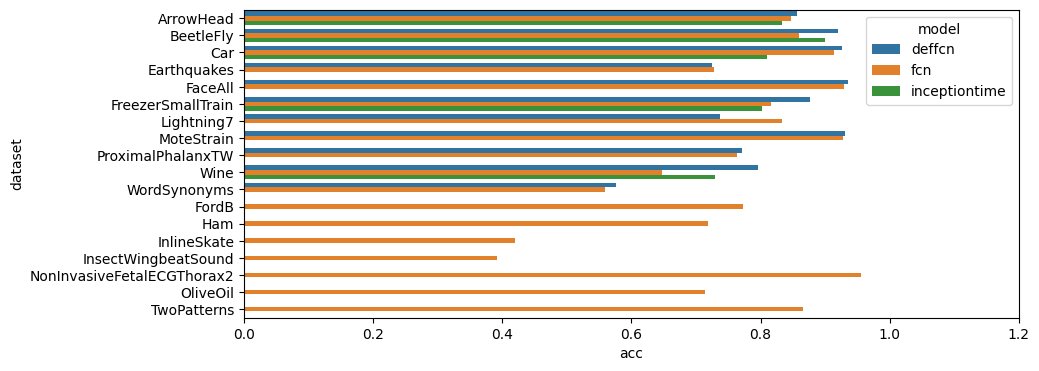

In [75]:
plt.figure(figsize=(10, 4))
sns.barplot(data=grouped_subset_results, x='acc', y='dataset', hue='model')
plt.xlim([0, 1.2])